# Keras Regression Model

**Content**
The feature set includes:

1. Cement
2. Blast Furnace Slag
3. Fly Ash
4. Water
5. Super-plasticizer
6. Coarse Aggregate
7. Fine Aggregate
8. Age

**The target set is:**

- Strength of the Cement

# Imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Data Visualization

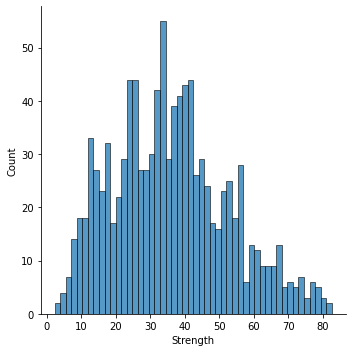

In [7]:
sns.displot(df['Strength'],kde=False,bins=50)

In [8]:
df.corr()['Strength'].sort_values()

Water                -0.289633
Fine Aggregate       -0.167241
Coarse Aggregate     -0.164935
Fly Ash              -0.105755
Blast Furnace Slag    0.134829
Age                   0.328873
Superplasticizer      0.366079
Cement                0.497832
Strength              1.000000
Name: Strength, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Strength'>

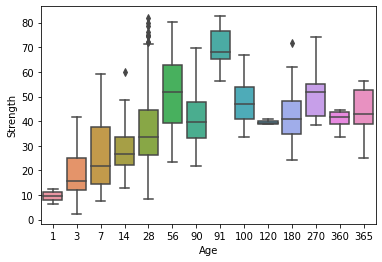

In [9]:
sns.boxplot(x='Age',y='Strength',data=df)

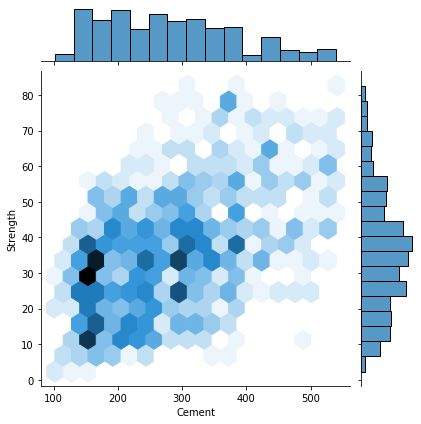

In [10]:
sns.jointplot(x='Cement',y='Strength',data=df,kind='hex')

# Scaling and Train-Test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Strength',axis=1)
y = df['Strength']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling 

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scalar = MinMaxScaler()

In [16]:
X_train = scalar.fit_transform(X_train)

In [17]:
X_test = scalar.transform(X_test)

In [18]:
X_test.shape

(309, 8)

# Model creation

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [20]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=600,
          validation_data=(X_test, y_test.values), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
23/23 [==============================] - 1s 18ms/step - loss: 1588.5948 - val_loss: 1491.5775
Epoch 2/600
23/23 [==============================] - 0s 5ms/step - loss: 1576.7660 - val_loss: 1480.2019
Epoch 3/600
23/23 [==============================] - 0s 6ms/step - loss: 1563.1057 - val_loss: 1464.1754
Epoch 4/600
23/23 [==============================] - 0s 6ms/step - loss: 1541.1868 - val_loss: 1435.1073
Epoch 5/600
23/23 [==============================] - 0s 5ms/step - loss: 1500.0785 - val_loss: 1377.5178
Epoch 6/600
23/23 [==============================] - 0s 5ms/step - loss: 1416.6975 - val_loss: 1264.6552
Epoch 7/600
23/23 [==============================] - 0s 6ms/step - loss: 1262.5840 - val_loss: 1062.3094
Epoch 8/600
23/23 [==============================] - 0s 5ms/step - loss: 1012.7692 - val_loss: 777.8372
Epoch 9/600
23/23 [==============================] - 0s 6ms/step - loss: 698.0449 - val_loss: 483.6971
Epoch 10/600
23/23 [==============================] - 0s 

23/23 [==============================] - 0s 6ms/step - loss: 112.3711 - val_loss: 116.9500
Epoch 80/600
23/23 [==============================] - 0s 6ms/step - loss: 111.6741 - val_loss: 116.8504
Epoch 81/600
23/23 [==============================] - 0s 4ms/step - loss: 111.5553 - val_loss: 116.5725
Epoch 82/600
23/23 [==============================] - 0s 5ms/step - loss: 111.2858 - val_loss: 116.1029
Epoch 83/600
23/23 [==============================] - 0s 8ms/step - loss: 111.1151 - val_loss: 115.9715
Epoch 84/600
23/23 [==============================] - 0s 6ms/step - loss: 110.7644 - val_loss: 115.5035
Epoch 85/600
23/23 [==============================] - 0s 5ms/step - loss: 110.9683 - val_loss: 115.3235
Epoch 86/600
23/23 [==============================] - 0s 5ms/step - loss: 110.3583 - val_loss: 115.1484
Epoch 87/600
23/23 [==============================] - 0s 5ms/step - loss: 110.3080 - val_loss: 114.8278
Epoch 88/600
23/23 [==============================] - 0s 5ms/step - loss: 109

23/23 [==============================] - 0s 5ms/step - loss: 91.1667 - val_loss: 93.6699
Epoch 158/600
23/23 [==============================] - 0s 5ms/step - loss: 90.4660 - val_loss: 93.4644
Epoch 159/600
23/23 [==============================] - 0s 5ms/step - loss: 90.2146 - val_loss: 93.1267
Epoch 160/600
23/23 [==============================] - 0s 5ms/step - loss: 89.7601 - val_loss: 92.6905
Epoch 161/600
23/23 [==============================] - 0s 5ms/step - loss: 89.4162 - val_loss: 92.9557
Epoch 162/600
23/23 [==============================] - 0s 5ms/step - loss: 89.1454 - val_loss: 92.1486
Epoch 163/600
23/23 [==============================] - 0s 5ms/step - loss: 88.7645 - val_loss: 91.7065
Epoch 164/600
23/23 [==============================] - 0s 5ms/step - loss: 88.0430 - val_loss: 91.1539
Epoch 165/600
23/23 [==============================] - 0s 5ms/step - loss: 87.3696 - val_loss: 90.9007
Epoch 166/600
23/23 [==============================] - 0s 6ms/step - loss: 87.4839 - va

23/23 [==============================] - 0s 5ms/step - loss: 55.8924 - val_loss: 60.9349
Epoch 237/600
23/23 [==============================] - 0s 5ms/step - loss: 54.4580 - val_loss: 55.9556
Epoch 238/600
23/23 [==============================] - 0s 5ms/step - loss: 54.7811 - val_loss: 55.4543
Epoch 239/600
23/23 [==============================] - 0s 5ms/step - loss: 54.4011 - val_loss: 56.2904
Epoch 240/600
23/23 [==============================] - 0s 5ms/step - loss: 54.8328 - val_loss: 55.3157
Epoch 241/600
23/23 [==============================] - 0s 5ms/step - loss: 54.8336 - val_loss: 56.7210
Epoch 242/600
23/23 [==============================] - 0s 4ms/step - loss: 54.2178 - val_loss: 56.0686
Epoch 243/600
23/23 [==============================] - 0s 5ms/step - loss: 52.9740 - val_loss: 54.7099
Epoch 244/600
23/23 [==============================] - 0s 5ms/step - loss: 52.9490 - val_loss: 58.2660
Epoch 245/600
23/23 [==============================] - 0s 5ms/step - loss: 54.0247 - va

23/23 [==============================] - 0s 5ms/step - loss: 48.3319 - val_loss: 51.1572
Epoch 316/600
23/23 [==============================] - 0s 4ms/step - loss: 48.5268 - val_loss: 49.1929
Epoch 317/600
23/23 [==============================] - 0s 5ms/step - loss: 48.8474 - val_loss: 49.1771
Epoch 318/600
23/23 [==============================] - 0s 6ms/step - loss: 48.3842 - val_loss: 52.4179
Epoch 319/600
23/23 [==============================] - 0s 5ms/step - loss: 48.9480 - val_loss: 50.6019
Epoch 320/600
23/23 [==============================] - 0s 5ms/step - loss: 48.2495 - val_loss: 49.2033
Epoch 321/600
23/23 [==============================] - 0s 6ms/step - loss: 48.5813 - val_loss: 49.4007
Epoch 322/600
23/23 [==============================] - 0s 6ms/step - loss: 48.4798 - val_loss: 49.5302
Epoch 323/600
23/23 [==============================] - 0s 5ms/step - loss: 48.1546 - val_loss: 50.8620
Epoch 324/600
23/23 [==============================] - 0s 6ms/step - loss: 48.4136 - va

23/23 [==============================] - 0s 6ms/step - loss: 47.4639 - val_loss: 48.8365
Epoch 395/600
23/23 [==============================] - 0s 7ms/step - loss: 47.1919 - val_loss: 50.4657
Epoch 396/600
23/23 [==============================] - 0s 6ms/step - loss: 48.0087 - val_loss: 47.7922
Epoch 397/600
23/23 [==============================] - 0s 5ms/step - loss: 47.5609 - val_loss: 47.6186
Epoch 398/600
23/23 [==============================] - 0s 6ms/step - loss: 47.4388 - val_loss: 48.0946
Epoch 399/600
23/23 [==============================] - 0s 6ms/step - loss: 47.4938 - val_loss: 49.9263
Epoch 400/600
23/23 [==============================] - 0s 4ms/step - loss: 47.3384 - val_loss: 49.6567
Epoch 401/600
23/23 [==============================] - 0s 6ms/step - loss: 47.1630 - val_loss: 48.5536
Epoch 402/600
23/23 [==============================] - 0s 6ms/step - loss: 46.8589 - val_loss: 52.1821
Epoch 403/600
23/23 [==============================] - 0s 5ms/step - loss: 47.3950 - va

23/23 [==============================] - 0s 6ms/step - loss: 45.6389 - val_loss: 48.2149
Epoch 00473: early stopping


In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses.head()

,loss,val_loss
0,1588.594849,1491.577515
1,1576.765991,1480.201904
2,1563.105713,1464.175415
3,1541.186768,1435.107300
4,1500.078491,1377.517822


<AxesSubplot:>

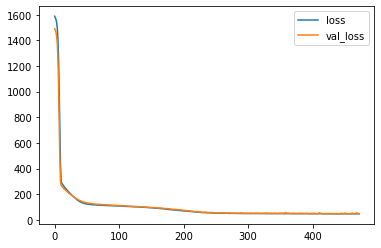

In [26]:
losses.plot()

In [27]:
predictions = model.predict(X_test)

# Evaluation on Test Data

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [29]:
mean_absolute_error(y_test,predictions)

5.283631697349178

In [30]:
np.sqrt(mean_squared_error(y_test,predictions))

6.943698227075604

In [31]:
explained_variance_score(y_test,predictions)

0.8272979640337472

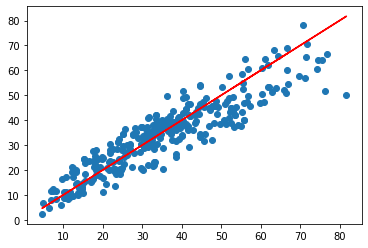

In [32]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [33]:
new_cement = df.drop('Strength',axis=1).iloc[1029]

In [34]:
new_cement = scalar.transform(new_cement.values.reshape(-1,8))

c:\users\swapnil\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [35]:
model.predict(new_cement)

array([[35.5293]], dtype=float32)

In [36]:
df.iloc[1029]['Strength']

32.4

**Conclusion** : Sucessfully created keras regression model predicting new strength of cement : 35 , over originl strength of 32.4  with following evalution:
- mean_absolute_error : 5.283631697349178
- np.sqrt : 6.943698227075604
- explained_variance_score : 0.8272979640337472